In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lending-club/rejected_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv
/kaggle/input/lending-club/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv


In [ ]:
import pandas as pd

path = "rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv"

df_rejected = pd.read_csv(path, low_memory=False, nrows=500_000)  # sample for quicker EDA
df_rejected.head()
df_rejected.columns

Index(['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code'],
      dtype='object')

In [ ]:
import pandas as pd

path = "accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv"

df_accepted = pd.read_csv(path, low_memory=False, nrows=500_000)  # sample for quicker EDA
df_accepted.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(df_accepted.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)


In [4]:
df_accepted.isna().sum()

id                            0
member_id                500000
loan_amnt                     2
funded_amnt                   2
funded_amnt_inv               2
                          ...  
settlement_status        488251
settlement_date          488251
settlement_amount        488251
settlement_percentage    488251
settlement_term          488251
Length: 151, dtype: int64

Shape: (500000, 151)

Columns: ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc'] ...

Loan status counts:
loan_status
Fully Paid            312340
Current               104240
Charged Off            78824
Late (31-120 days)      2977
In Grace Period         1046
Late (16-30 days)        567
Default                    4
Name: count, dtype: int64


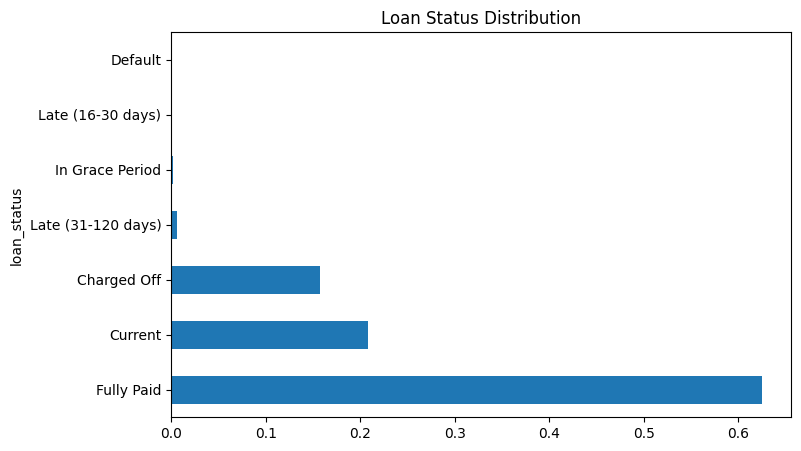

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns
print("Shape:", df_accepted.shape)
print("\nColumns:", df_accepted.columns.tolist()[:20], "...")  # peek at first 20 columns

# --- Target variable ---
print("\nLoan status counts:")
print(df_accepted['loan_status'].value_counts())

df_accepted['loan_status'].value_counts(normalize=True).plot(kind='barh', figsize=(8,5))
plt.title("Loan Status Distribution")
plt.show()

### task 1 - exploratory data analysis

Loading full file (may be large)...
Initial shape: (2260701, 151)
Columns count: 151

--- loan_status counts ---
loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64


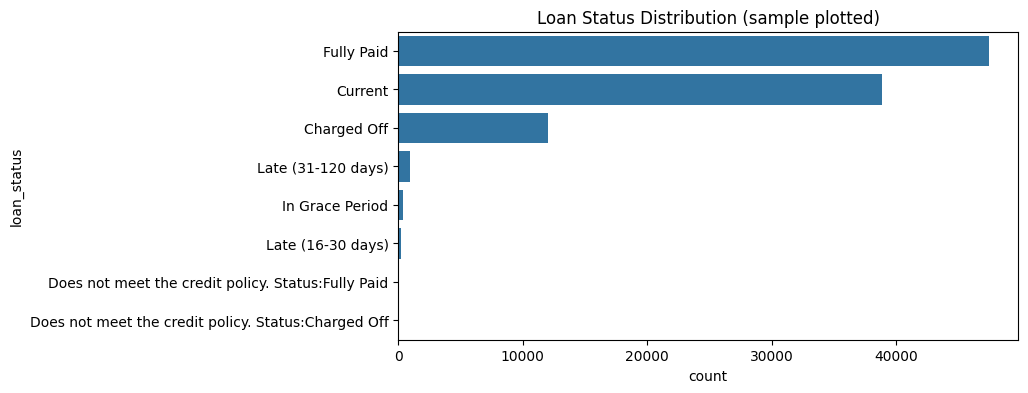


After mapping target, counts (including NaN):
target
0.0    1078739
NaN     912602
1.0     269360
Name: count, dtype: int64
After dropping unresolved, shape: (1348099, 152)
Target balance: target
0    1078739
1     269360
Name: count, dtype: int64 
Proportion default: 19.98%

Top 30 columns by missing fraction:
member_id                                     1.000000
next_pymnt_d                                  0.997931
orig_projected_additional_accrued_interest    0.997210
hardship_amount                               0.995730
hardship_last_payment_amount                  0.995730
hardship_length                               0.995730
hardship_status                               0.995730
hardship_reason                               0.995730
deferral_term                                 0.995730
hardship_start_date                           0.995730
hardship_end_date                             0.995730
hardship_type                                 0.995730
hardship_loan_status      

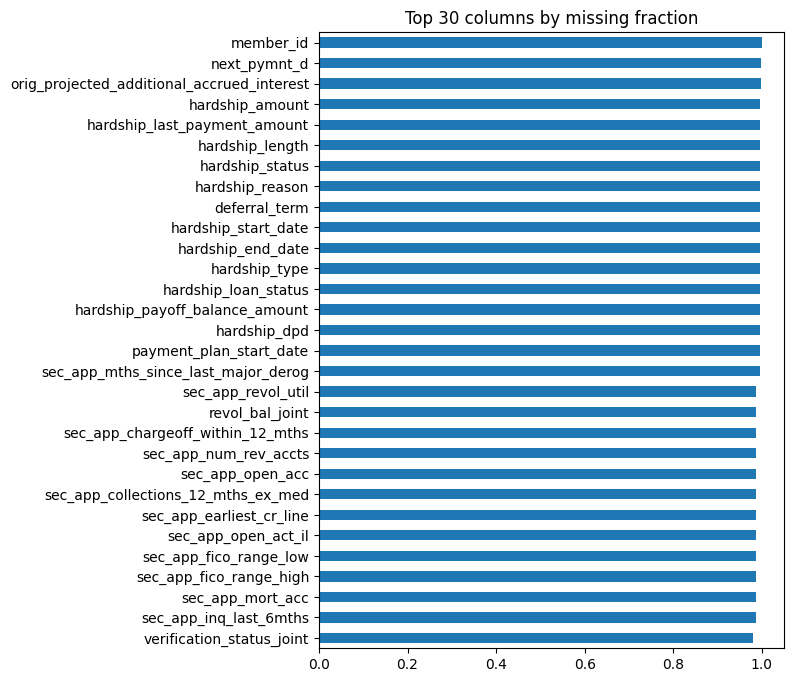


Available recommended features (kept): ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'application_type', 'issue_d', 'earliest_cr_line']
Working df shape: (1348099, 24)

Numeric describe (initial):


,count,mean,std,min,25%,50%,75%,max
loan_amnt,1348099.0,14408.998913,8716.137925,500.00,7975.00,12000.00,20000.00,40000.00
int_rate,1348099.0,13.241562,4.765685,5.31,9.75,12.74,15.99,30.99
installment,1348099.0,437.777843,261.497190,4.93,248.28,375.04,580.22,1719.83
annual_inc,1348095.0,76237.743295,69922.741975,0.00,45750.00,65000.00,90000.00,10999200.00
dti,1347725.0,18.274253,11.155495,-1.00,11.79,17.61,24.05,999.00
delinq_2yrs,1348070.0,0.317633,0.877744,0.00,0.00,0.00,0.00,39.00
inq_last_6mths,1348069.0,0.662204,0.960071,0.00,0.00,0.00,1.00,33.00
open_acc,1348070.0,11.590447,5.474680,0.00,8.00,11.00,14.00,90.00
pub_rec,1348070.0,0.215050,0.601472,0.00,0.00,0.00,0.00,86.00
revol_bal,1348099.0,16270.715447,22477.508148,0.00,5936.00,11130.00,19758.00,2904836.00



After parsing engineered numeric columns:


,count,mean,std,min,25%,50%,75%,max
int_rate,1348099.0,0.132416,0.047657,0.053100,0.097500,0.127400,0.1599,0.309900
revol_util,1347202.0,0.518120,0.245298,0.000000,0.334000,0.522000,0.7070,8.923000
term_months,1348099.0,41.784020,10.264584,36.000000,36.000000,36.000000,36.0000,60.000000
emp_length_yrs,1269549.0,5.962054,3.691822,0.000000,2.000000,6.000000,10.0000,10.000000
credit_age_years,1348070.0,16.250383,7.508100,0.503765,11.170431,14.748802,20.0000,83.249829



Categorical columns to inspect: ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'application_type']

Top categories for term:
term
36 months    1023206
60 months     324893
Name: count, dtype: int64

Top categories for grade:
grade
B    393102
C    382323
A    235193
D    201657
E     94192
F     32306
G      9326
Name: count, dtype: int64

Top categories for sub_grade:
sub_grade
C1    85618
B4    83276
B5    82639
B3    81901
C2    79358
C3    75129
C4    74554
B2    74080
B1    71206
C5    67664
Name: count, dtype: int64

Top categories for home_ownership:
home_ownership
MORTGAGE    666852
RENT        535699
OWN         145027
ANY            286
OTHER          182
NONE            53
Name: count, dtype: int64

Top categories for verification_status:
verification_status
Source Verified    521579
Verified           418979
Not Verified       407541
Name: count, dtype: int64

Top categories for purpose:
purpose
debt_consolidation    781442

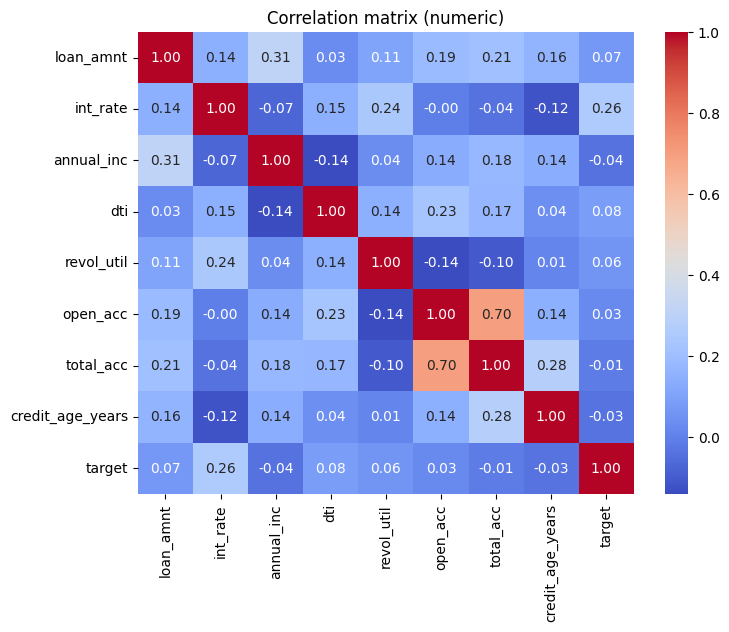

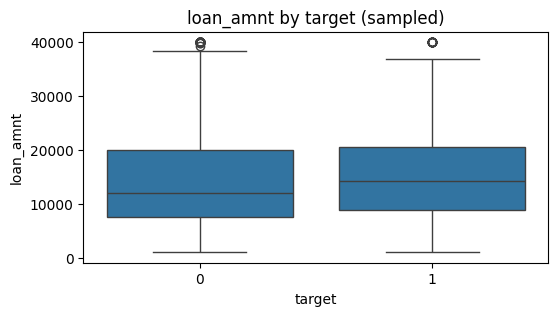

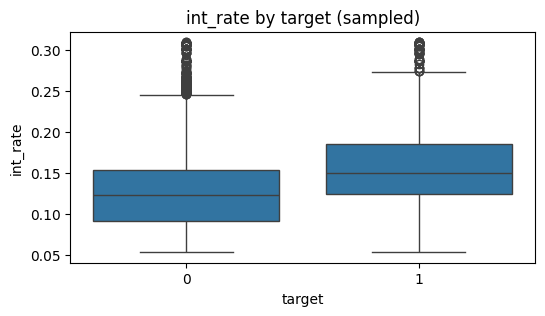

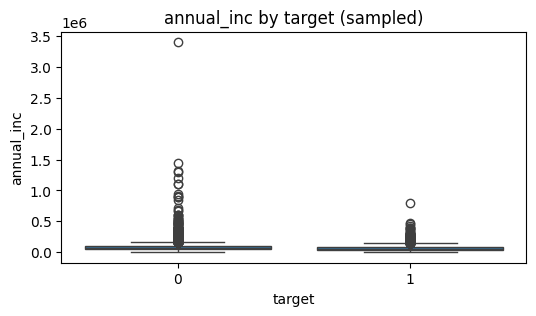

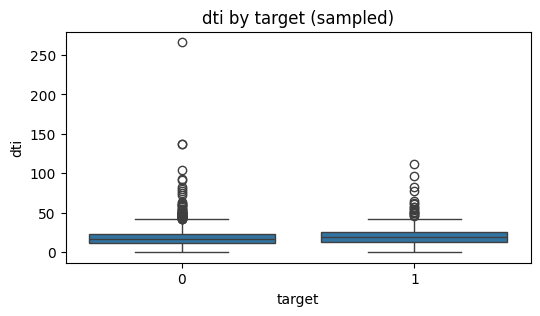

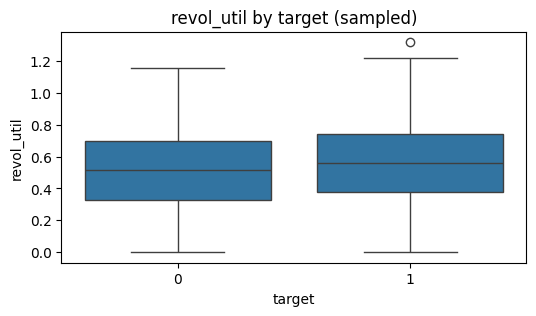

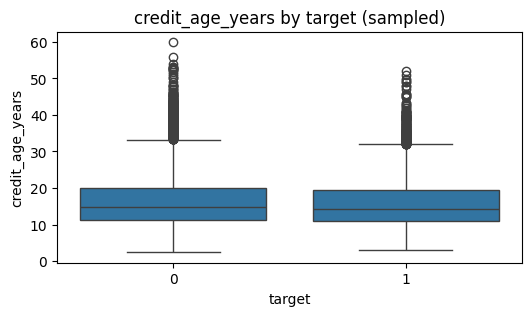


Missing fraction (features):
emp_length             0.058267
emp_length_yrs         0.058267
revol_util             0.000665
dti                    0.000277
inq_last_6mths         0.000022
open_acc               0.000022
pub_rec                0.000022
delinq_2yrs            0.000022
total_acc              0.000022
earliest_cr_line       0.000022
credit_age_years       0.000022
annual_inc             0.000003
purpose                0.000000
home_ownership         0.000000
sub_grade              0.000000
installment            0.000000
grade                  0.000000
term                   0.000000
int_rate               0.000000
loan_amnt              0.000000
verification_status    0.000000
revol_bal              0.000000
addr_state             0.000000
issue_d                0.000000
application_type       0.000000
term_months            0.000000
target                 0.000000
dtype: float64

Final features chosen: ['loan_amnt', 'int_rate', 'term_months', 'installment', 'annual_inc

In [ ]:
# ## EDA + Preprocessing for LendingClub (accepted loans)
# Paste into a Kaggle notebook cell and run. Adjust FAST_DEBUG to True to iterate quickly.

import os
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# ---------- Config ----------
DATA_FILE = "accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv"
FAST_DEBUG = False           # set True for quick iteration (loads fewer rows)
SAMPLE_NROWS = 300_000       # used only when FAST_DEBUG=True
NUM_PLOT_SAMPLES = 100_000   # number of rows for plotting (memory friendly)

# ---------- Helpers ----------
def load_sample(path, nrows=None):
    if nrows is None:
        print("Loading full file (may be large)...")
        return pd.read_csv(path, low_memory=False)
    else:
        print(f"Loading first {nrows:,} rows (fast debug)...")
        return pd.read_csv(path, low_memory=False, nrows=nrows)

def pct(x): return f"{100*x:.2f}%"

# ---------- 0) Load data ----------
if FAST_DEBUG:
    df = load_sample(DATA_FILE, nrows=SAMPLE_NROWS)
else:
    df = load_sample(DATA_FILE, nrows=None)

print("Initial shape:", df.shape)
print("Columns count:", len(df.columns))


# ---------- 1) Quick target distribution ----------
print("\n--- loan_status counts ---")
print(df['loan_status'].value_counts())

# Visualize distribution (plot on subset if huge)
plot_df = df if len(df) <= NUM_PLOT_SAMPLES else df.sample(NUM_PLOT_SAMPLES, random_state=RANDOM_SEED)
plt.figure(figsize=(8,4))
sns.countplot(y='loan_status', data=plot_df, order=plot_df['loan_status'].value_counts().index)
plt.title("Loan Status Distribution (sample plotted)")
plt.show()

# ---------- 2) Map to binary target and drop uncertain rows ----------
# Strategy: 0 = Fully Paid, 1 = Default (Charged Off + Default). Drop 'Current' & other unresolved statuses.
def map_target(s):
    s = str(s).lower()
    if 'fully paid' in s: return 0
    if 'charged off' in s or s.strip().lower() == 'default': return 1
    return np.nan  # drop everything else (current / late / in grace / etc)

df['target'] = df['loan_status'].map(map_target)
print("\nAfter mapping target, counts (including NaN):")
print(df['target'].value_counts(dropna=False))

# Drop unresolved outcomes
df = df.dropna(subset=['target']).copy()
df['target'] = df['target'].astype(int)
print("After dropping unresolved, shape:", df.shape)
print("Target balance:", df['target'].value_counts(), "\nProportion default:", pct(df['target'].mean()))

# ---------- 3) Missing values overview ----------
missing_frac = df.isna().mean().sort_values(ascending=False)
print("\nTop 30 columns by missing fraction:")
print(missing_frac.head(30))

plt.figure(figsize=(6,8))
missing_frac.head(30).plot(kind='barh')
plt.title("Top 30 columns by missing fraction")
plt.gca().invert_yaxis()
plt.show()

# ---------- 4) Select candidate features (origination-only, no leakage) ----------
# Rationale: keep only what was available at approval time. Drop post-issue repayment fields.
# Candidate numeric features frequently useful: loan amount, interest rate, installment, annual_inc, dti, revol_util, open_acc, total_acc, delinq_2yrs, inq_last_6mths, pub_rec, emp_length (parsed), term
# Candidate categorical: grade, sub_grade, home_ownership, verification_status, purpose, addr_state, application_type

# Minimal recommended feature list (origination-only)
recommended = [
    'loan_amnt','term','int_rate','installment','grade','sub_grade',
    'emp_length','home_ownership','annual_inc','verification_status','purpose','addr_state',
    'dti','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc',
    'application_type','issue_d','earliest_cr_line'
]

# Keep only features that exist in file
available = [c for c in recommended if c in df.columns]
print("\nAvailable recommended features (kept):", available)

data = df[available + ['target']].copy()
print("Working df shape:", data.shape)

# ---------- 5) Quick numeric summaries ----------
num_cols = [c for c in available if data[c].dtype in [np.float64, np.int64] or c in ['loan_amnt','installment','annual_inc','dti','revol_bal','revol_util']]
# Note: some numeric fields may be strings (int_rate contains '%', revol_util may be string). We'll parse next.

print("\nNumeric describe (initial):")
display(data[num_cols].describe().T)

# ---------- 6) Parse and engineer small set of features ----------
import re
def parse_percent_col(series):
    # e.g., '13.56%' or '13.56'
    return series.astype(str).str.replace('%','', regex=False).replace('nan','', regex=False).replace('', np.nan).astype(float)

if 'int_rate' in data.columns:
    data['int_rate'] = parse_percent_col(data['int_rate']) / 100.0

if 'revol_util' in data.columns:
    data['revol_util'] = parse_percent_col(data['revol_util']) / 100.0

# parse term -> number months
if 'term' in data.columns:
    data['term_months'] = data['term'].astype(str).str.extract(r'(\d+)').astype(float)

# parse emp_length to years (simple)
def parse_emp(x):
    x = str(x)
    if x.lower().startswith('n/a') or x.lower().strip()=='nan': return np.nan
    if '<' in x: return 0.0
    m = re.search(r'(\d+)', x)
    if m:
        val = int(m.group(1))
        # treat '10+' as 10
        return float(min(val, 10))
    return np.nan

if 'emp_length' in data.columns:
    data['emp_length_yrs'] = data['emp_length'].map(parse_emp)

# credit age in years
def to_date_try(s):
    try:
        return pd.to_datetime(s, format='%b-%Y')
    except:
        return pd.to_datetime(s, errors='coerce')

if {'issue_d','earliest_cr_line'}.issubset(data.columns):
    issue_dates = data['issue_d'].map(to_date_try)
    ecl_dates = data['earliest_cr_line'].map(to_date_try)
    data['credit_age_years'] = ((issue_dates - ecl_dates).dt.days / 365.25)

# show new columns summary
print("\nAfter parsing engineered numeric columns:")
display(data[['int_rate','revol_util','term_months','emp_length_yrs','credit_age_years']].describe().T)

# ---------- 7) Categorical summaries ----------
cat_cols = [c for c in available if c not in num_cols and c not in ['issue_d','earliest_cr_line','emp_length']]
print("\nCategorical columns to inspect:", cat_cols)
for c in cat_cols:
    print(f"\nTop categories for {c}:")
    print(data[c].value_counts().head(10))

# ---------- 8) Correlations and feature-target relationships ----------
# Choose a small numeric set for correlation matrix
corr_cols = ['loan_amnt','int_rate','annual_inc','dti','revol_util','open_acc','total_acc','credit_age_years']
corr_cols = [c for c in corr_cols if c in data.columns]
plt.figure(figsize=(8,6))
sns.heatmap(data[corr_cols + ['target']].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation matrix (numeric)")
plt.show()

# Boxplots / violin plots of key numerics by target
for c in ['loan_amnt','int_rate','annual_inc','dti','revol_util','credit_age_years']:
    if c in data.columns:
        plt.figure(figsize=(6,3))
        sns.boxplot(x='target', y=c, data=data.sample(n=min(len(data), 20000), random_state=RANDOM_SEED))
        plt.title(f"{c} by target (sampled)")
        plt.show()

# ---------- 9) Missing values for features of interest ----------
feat_missing = data.isna().mean().sort_values(ascending=False)
print("\nMissing fraction (features):")
print(feat_missing.head(40))

# ---------- 10) Proposed Feature Selection (explain and finalize) ----------
# Based on availability, correlations, and domain: pick a compact set for modeling.
# Justification (short):
#  - loan_amnt, int_rate, term_months, installment: loan terms directly influence revenue & risk
#  - annual_inc, dti, emp_length_yrs: borrower ability to pay
#  - grade/sub_grade: LendingClub internal risk score (highly predictive)
#  - home_ownership, verification_status, purpose: borrower profile and stability proxies
#  - revol_util, open_acc, total_acc, delinq_2yrs, inq_last_6mths, pub_rec, credit_age_years: credit history
#
# Build final features list (only features present)
final_features = []
candidates = [
    'loan_amnt','int_rate','term_months','installment',
    'annual_inc','dti','emp_length_yrs',
    'grade','sub_grade','home_ownership','verification_status','purpose','addr_state','application_type',
    'revol_util','open_acc','total_acc','delinq_2yrs','inq_last_6mths','pub_rec','credit_age_years'
]
final_features = [c for c in candidates if c in data.columns]
print("\nFinal features chosen:", final_features)

# ---------- 11) Preprocessing pipeline (sklearn) ----------
# - Numeric: impute (median) -> StandardScaler
# - Categorical: impute (constant 'missing') -> OneHotEncoder(handle_unknown='ignore')
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = [c for c in final_features if data[c].dtype in [np.float64, np.int64] or c in ['loan_amnt','installment','annual_inc','dti','revol_util','credit_age_years','term_months','emp_length_yrs']]
categorical_features = [c for c in final_features if c not in numeric_features]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
], remainder='drop')

# Fit preprocessor quickly on a sample (to inspect output dims)
sample_for_fit = data[final_features].sample(n=min(100000, len(data)), random_state=RANDOM_SEED)
preprocessor.fit(sample_for_fit)
# compute transformed shape
transformed_example = preprocessor.transform(sample_for_fit.iloc[:10])
print("\nTransformed feature vector shape (per row):", transformed_example.shape[1])

# ---------- 12) Save processed dataset for modeling (optional) ----------
# If you want a ready numeric matrix and labels on disk:
X = preprocessor.transform(data[final_features])
y = data['target'].values
print("Prepared X shape:", X.shape, "y shape:", y.shape)

# Optional: persist to disk in C:/Users/z048523/Downloads for model training cells later

np.save("C:/Users/z048523/Downloads/X.npy", X.astype('float32'))
print("Saved preprocessor and X/y to C:/Users/z048523/Downloads")

# ---------- 13) Quick class balance & training split suggestion ----------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y)
print("Train/Test shapes:", X_train.shape, X_test.shape)
print("Train target distribution:", np.bincount(y_train), "Test:", np.bincount(y_test))

# End of EDA/Preprocessing cell.


In [15]:

np.save("C:/Users/z048523/Downloads/y.npy", y)

In [16]:
import numpy as np, joblib, torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

X = np.load("C:/Users/z048523/Downloads/X.npy")
y = np.load("C:/Users/z048523/Downloads/y.npy")

# train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_SEED
)
